# Environmental Conditions Analysis and Energy Consumption Prediction for Greenhouses

_Detailed information about the project here including greenhouse, its location, layout, weather station, sensors, data collector, explanation of each column in data files etc._

## Libraries

In [1]:
import pandas as pd

## Load Data

### 1. East Greenhouse

#### a. East Fan Wall Side Data

In [6]:
# EF indicates East Fan wall side
East_GH_FW = pd.read_excel("../data/Oct-25_East.xlsx", sheet_name = "EF")
East_GH_FW.head()

,Date_EF,PPFD_EF,Temperature_EF,Humidity_EF,CO2_EF,Dew Point_EF,VPD_EF,Pressure_EF
0,Oct 1 2025 12:00:00 AM,0.000,20.455,98.275,634.4,20.097,0.042,99.524
1,Oct 1 2025 12:10:00 AM,0.000,20.437,98.661,639.1,20.142,0.032,99.520
2,Oct 1 2025 12:20:00 AM,0.000,20.422,98.523,637.5,20.105,0.036,99.515
3,Oct 1 2025 12:30:00 AM,0.023,20.325,98.644,643.4,20.028,0.032,99.520
4,Oct 1 2025 12:40:00 AM,0.000,20.403,98.517,629.4,20.084,0.036,99.512


#### b. East Cool Wall Side Data

In [7]:
# EC indicates East cool wall side
East_GH_CW = pd.read_excel("../data/Oct-25_East.xlsx", sheet_name = "EC")
East_GH_CW.head()

,Date_EC,PPFD_EC,Temperature_EC,Humidity_EC,CO2_EC,Dew Point_EC,VPD_EC,Pressure_EC
0,Oct 1 2025 12:00:00 AM,0.028,20.228,99.306,653.0,20.039,0.016,99.458
1,Oct 1 2025 12:10:00 AM,0.027,20.266,99.247,655.7,20.068,0.018,99.451
2,Oct 1 2025 12:20:00 AM,0.042,20.236,99.256,655.0,20.039,0.018,99.449
3,Oct 1 2025 12:30:00 AM,0.020,20.193,99.321,655.9,20.007,0.016,99.456
4,Oct 1 2025 12:40:00 AM,0.080,20.216,99.235,651.3,20.016,0.018,99.450


### 2. West Greenhouse

#### a. West Fan Wall Side Data

_We don't have the data for West fan wall side as they weather station went under maintenance_

#### b. West Cool Wall Side Data

In [8]:
# WC indicates West cool wall side
West_GH_CW = pd.read_excel("../data/Oct-25_West.xlsx")
West_GH_CW.head()

,Date_WC,PPFD_WC,Temperature_WC,Humidity_WC,CO2_WC,Dew Point_WC,VPD_WC,Pressure_WC
0,Oct 1 2025 12:00:00 AM,0.010,20.756,99.547,721.9,20.600,0.011,99.500
1,Oct 1 2025 12:10:00 AM,0.028,20.637,99.767,732.3,20.518,0.006,99.491
2,Oct 1 2025 12:20:00 AM,0.000,20.457,99.920,727.4,20.364,0.002,99.486
3,Oct 1 2025 12:30:00 AM,0.047,20.852,99.315,745.4,20.657,0.017,99.493
4,Oct 1 2025 12:40:00 AM,0.000,20.441,99.941,725.9,20.352,0.001,99.487


## Data Cleaning and Manipulation

### East Fan Wall Side

In [17]:
# strip them to remove both leading and trailing whitespace
df_east.columns = df_east.columns.str.strip()

# Convert 'Date_EF' column in East Fan wall side to datetime
df_east['Date_EF'] = pd.to_datetime(df_east['Date_EF'])

# Cleaning of PPFD value
df_east['PPFD_EF'] = df_east['PPFD_EF'].apply(
    lambda x: 0 if x < 0.2 else ("" if x > 2000 else x))

# Now set 'Date_EF' of east fan wall side as the index
df_east.set_index('Date_EF', inplace=True)

# Resample to hourly data and take the mean
hourly_PPFD_EF = df_east['PPFD_EF'].resample('h').mean()
hourly_temperature_EF = df_east['Temperature_EF'].resample('h').mean()
hourly_humidity_EF = df_east['Humidity_EF'].resample('h').mean()
hourly_CO2_EF = df_east['CO2_EF'].resample('h').mean()
hourly_VPD_EF = df_east['VPD_EF'].resample('h').mean()
hourly_pressure_EF = df_east['Pressure_EF'].resample('h').mean()

# Display hourly temperature data on east fan wall side
print(hourly_PPFD_EF)

C:\Users\nzr0069\AppData\Local\Temp\ipykernel_28036\3462924168.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_east['Date_EF'] = pd.to_datetime(df_east['Date_EF'])


Date_EF
2025-10-01 00:00:00    0.0
2025-10-01 01:00:00    0.0
2025-10-01 02:00:00    0.0
2025-10-01 03:00:00    0.0
2025-10-01 04:00:00    0.0
                      ... 
2025-10-31 19:00:00    0.0
2025-10-31 20:00:00    0.0
2025-10-31 21:00:00    0.0
2025-10-31 22:00:00    0.0
2025-10-31 23:00:00    0.0
Name: PPFD_EF, Length: 744, dtype: float64


### East cool wall side

In [4]:
# Convert 'Date_EC' column in East cool wall side to datetime
df_east['Date_EC'] = pd.to_datetime(df_east['Date_EC'])

# Cleaning of PPFD value
df_east['PPFD_EC'] = df_east['PPFD_EC'].apply(
    lambda y: 0 if y < 0.2 else ("" if y > 2000 else y))
df_east['PPFD_EC'] = pd.to_numeric(df_east['PPFD_EC'], errors='coerce')

# Now set 'Date_EC' of east cool wall side as the index
df_east.set_index('Date_EC', inplace=True)

# Resample to hourly data and take the mean
hourly_PPFD_EC = df_east['PPFD_EC'].resample('H').mean()
hourly_temperature_EC = df_east['Temperature_EC'].resample('H').mean()
hourly_humidity_EC = df_east['Humidity_EC'].resample('H').mean()
hourly_CO2_EC = df_east['CO2_EC'].resample('H').mean()
hourly_VPD_EC = df_east['VPD_EC'].resample('H').mean()
hourly_pressure_EC = df_east['Pressure_EC'].resample('H').mean()

# Display hourly temperature data on east cool wall side
print(hourly_PPFD_EC)

/tmp/ipython-input-1642989413.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_east['Date_EC'] = pd.to_datetime(df_east['Date_EC'])


Date_EC
2025-10-01 00:00:00    0.0
2025-10-01 01:00:00    0.0
2025-10-01 02:00:00    0.0
2025-10-01 03:00:00    0.0
2025-10-01 04:00:00    0.0
                      ... 
2025-10-31 19:00:00    0.0
2025-10-31 20:00:00    0.0
2025-10-31 21:00:00    0.0
2025-10-31 22:00:00    0.0
2025-10-31 23:00:00    0.0
Freq: h, Name: PPFD_EC, Length: 744, dtype: float64


/tmp/ipython-input-1642989413.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_PPFD_EC = df_east['PPFD_EC'].resample('H').mean()
/tmp/ipython-input-1642989413.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_temperature_EC = df_east['Temperature_EC'].resample('H').mean()
/tmp/ipython-input-1642989413.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_humidity_EC = df_east['Humidity_EC'].resample('H').mean()
/tmp/ipython-input-1642989413.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_CO2_EC = df_east['CO2_EC'].resample('H').mean()
/tmp/ipython-input-1642989413.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_VPD_EC = df_east['VPD_EC'].resample('H').mean()
/tmp/ipython

## West side Greenhouse
- No data in Fan wall side weather station due to Instrument problem

In [41]:
# Load East side Greenhouse DataFrame - EF indicates East Fan wall side
df_west = pd.read_excel('/content/10. Oct-25_West.xlsx')
df_west.head(n=5)

,Date_WF,PPFD_WF,Temperature_WF,Humidity_WF,CO2_WF,Dew Point_WF,VPD_WF,Pressure_WF,Unnamed: 8,Date_WC,PPFD_WC,Temperature_WC,Humidity_WC,CO2_WC,Dew Point_WC,VPD_WC,Pressure_WC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:00:00 AM,0.010,20.756,99.547,721.9,20.600,0.011,99.500
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:10:00 AM,0.028,20.637,99.767,732.3,20.518,0.006,99.491
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:20:00 AM,0.000,20.457,99.920,727.4,20.364,0.002,99.486
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:30:00 AM,0.047,20.852,99.315,745.4,20.657,0.017,99.493
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:40:00 AM,0.000,20.441,99.941,725.9,20.352,0.001,99.487


## West Fan Wall Side

In [42]:
# strip them to remove both leading and trailing whitespace
df_west.columns = df_west.columns.str.strip()

# Replace Date_WF NaN with Date_WC values
df_west['Date_WF'] = df_west['Date_WF'].fillna(df_west['Date_WC'])

# Convert 'Date_WF' column in west Fan wall side to datetime
df_west['Date_WF'] = pd.to_datetime(df_west['Date_WF'])

df_west.head(n=5)

/tmp/ipython-input-3109002002.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_west['Date_WF'] = pd.to_datetime(df_west['Date_WF'])


,Date_WF,PPFD_WF,Temperature_WF,Humidity_WF,CO2_WF,Dew Point_WF,VPD_WF,Pressure_WF,Unnamed: 8,Date_WC,PPFD_WC,Temperature_WC,Humidity_WC,CO2_WC,Dew Point_WC,VPD_WC,Pressure_WC
0,2025-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:00:00 AM,0.010,20.756,99.547,721.9,20.600,0.011,99.500
1,2025-10-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:10:00 AM,0.028,20.637,99.767,732.3,20.518,0.006,99.491
2,2025-10-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:20:00 AM,0.000,20.457,99.920,727.4,20.364,0.002,99.486
3,2025-10-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:30:00 AM,0.047,20.852,99.315,745.4,20.657,0.017,99.493
4,2025-10-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct 1 2025 12:40:00 AM,0.000,20.441,99.941,725.9,20.352,0.001,99.487


In [43]:
# Replace NaN with blank for the entire dataframe
df_west[['PPFD_WF', 'Temperature_WF','Humidity_WF', 'CO2_WF', 'Dew Point_WF', 'VPD_WF', 'Pressure_WF']] = df_west[['PPFD_WF', 'Temperature_WF','Humidity_WF', 'CO2_WF', 'Dew Point_WF', 'VPD_WF', 'Pressure_WF']].fillna('', inplace=True)

df_west.head(n=5)

/tmp/ipython-input-3718349448.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_west[['PPFD_WF', 'Temperature_WF','Humidity_WF', 'CO2_WF', 'Dew Point_WF', 'VPD_WF', 'Pressure_WF']] = df_west[['PPFD_WF', 'Temperature_WF','Humidity_WF', 'CO2_WF', 'Dew Point_WF', 'VPD_WF', 'Pressure_WF']].fillna('', inplace=True)
/tmp/ipython-input-3718349448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_west[['PPFD_WF', 'Temperature_WF','Humidity_WF', 'CO2_WF', 'Dew Point_WF', 'VPD_WF', 'Pressure_WF']] = df_west[['PPFD_WF', 'Temperature_WF','Humidity_WF', 'CO2_WF', 'Dew Point_WF', 'VPD_WF', 'Pressure_WF']].fillna('', inplace=True)


,Date_WF,PPFD_WF,Temperature_WF,Humidity_WF,CO2_WF,Dew Point_WF,VPD_WF,Pressure_WF,Unnamed: 8,Date_WC,PPFD_WC,Temperature_WC,Humidity_WC,CO2_WC,Dew Point_WC,VPD_WC,Pressure_WC
0,2025-10-01 00:00:00,None,None,None,None,None,None,None,NaN,Oct 1 2025 12:00:00 AM,0.010,20.756,99.547,721.9,20.600,0.011,99.500
1,2025-10-01 00:10:00,None,None,None,None,None,None,None,NaN,Oct 1 2025 12:10:00 AM,0.028,20.637,99.767,732.3,20.518,0.006,99.491
2,2025-10-01 00:20:00,None,None,None,None,None,None,None,NaN,Oct 1 2025 12:20:00 AM,0.000,20.457,99.920,727.4,20.364,0.002,99.486
3,2025-10-01 00:30:00,None,None,None,None,None,None,None,NaN,Oct 1 2025 12:30:00 AM,0.047,20.852,99.315,745.4,20.657,0.017,99.493
4,2025-10-01 00:40:00,None,None,None,None,None,None,None,NaN,Oct 1 2025 12:40:00 AM,0.000,20.441,99.941,725.9,20.352,0.001,99.487


In [44]:
print(df_west.columns.tolist())

['Date_WF', 'PPFD_WF', 'Temperature_WF', 'Humidity_WF', 'CO2_WF', 'Dew Point_WF', 'VPD_WF', 'Pressure_WF', 'Unnamed: 8', 'Date_WC', 'PPFD_WC', 'Temperature_WC', 'Humidity_WC', 'CO2_WC', 'Dew Point_WC', 'VPD_WC', 'Pressure_WC']


In [45]:
# Now set 'Date_WF' of west fan wall side as the index
df_west.set_index('Date_WF', inplace=True)

# Resample to hourly data and take the mean
hourly_PPFD_WF = df_west['PPFD_WF'].resample('H').mean()
hourly_temperature_WF = df_west['Temperature_WF'].resample('H').mean()
hourly_humidity_WF = df_west['Humidity_WF'].resample('H').mean()
hourly_CO2_WF = df_west['CO2_WF'].resample('H').mean()
hourly_VPD_WF = df_west['VPD_WF'].resample('H').mean()
hourly_pressure_WF = df_west['Pressure_WF'].resample('H').mean()

# Display hourly temperature data on west fan wall side
print(hourly_temperature_WF)

/tmp/ipython-input-3379277514.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_PPFD_WF = df_west['PPFD_WF'].resample('H').mean()
/tmp/ipython-input-3379277514.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_temperature_WF = df_west['Temperature_WF'].resample('H').mean()
/tmp/ipython-input-3379277514.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_humidity_WF = df_west['Humidity_WF'].resample('H').mean()
/tmp/ipython-input-3379277514.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_CO2_WF = df_west['CO2_WF'].resample('H').mean()
/tmp/ipython-input-3379277514.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_VPD_WF = df_west['VPD_WF'].resample('H').mean()
/tmp/ipython-inpu

Date_WF
2025-10-01 00:00:00    NaN
2025-10-01 01:00:00    NaN
2025-10-01 02:00:00    NaN
2025-10-01 03:00:00    NaN
2025-10-01 04:00:00    NaN
                      ... 
2025-10-31 19:00:00    NaN
2025-10-31 20:00:00    NaN
2025-10-31 21:00:00    NaN
2025-10-31 22:00:00    NaN
2025-10-31 23:00:00    NaN
Freq: h, Name: Temperature_WF, Length: 744, dtype: object


## West cool wall side

In [46]:
# Convert 'Date_WC' column in West Cool wall side to datetime
df_west['Date_WC'] = pd.to_datetime(df_west['Date_WC'])

# strip them to remove both leading and trailing whitespace
df_west.columns = df_west.columns.str.strip()

# Cleaning of PPFD value
df_east['PPFD_WC'] = df_east['PPFD_WC'].apply(
    lambda x: 0 if x < 0.2 else ("" if x > 2000 else x))

# Now set 'Date_WC' of west cool wall side as the index
df_west.set_index('Date_WC', inplace=True)

# Resample to hourly data and take the mean temperature
hourly_PPFD_WC = df_west['PPFD_WC'].resample('H').mean()
hourly_temperature_WC = df_west['Temperature_WC'].resample('H').mean()
hourly_humidity_WC = df_west['Humidity_WC'].resample('H').mean()
hourly_CO2_WC = df_west['CO2_WC'].resample('H').mean()
hourly_VPD_WC = df_west['VPD_WC'].resample('H').mean()
hourly_pressure_WC = df_west['Pressure_WC'].resample('H').mean()

# Display hourly temperature data on west cool wall side
print(hourly_temperature_WC)

/tmp/ipython-input-3768734082.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_west['Date_WC'] = pd.to_datetime(df_west['Date_WC'])


KeyError: 'PPFD_WC'

## Outside weather station

In [12]:
# Load Outside Greenhouse DataFrame
df_out = pd.read_excel('/content/10. Oct-25_outside.xlsx')
df_out.head(n=5)

,time,Solar Radiation_out,Precipitation,Lightning Activity,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,Temperature_out,kPa Vapor Pressure,Pressure_out,° X-axis Level,° Y-axis Level,mm/h Max Precip Rate,°C RH Sensor Temp,VPD_out,% Battery Percent,mV Battery Voltage,kPa Reference Pressure,°C Logger Temperature
0,2025-10-01 00:00:00,0.0,0.000,0,0,230,0.28,0.86,19.6,2.283,99.49,0.5,1.4,0.0,19.5,0.0,100,8118,99.37,19.3
1,2025-10-01 00:15:00,0.0,0.017,0,0,201,0.41,0.84,19.7,2.295,99.48,0.5,1.4,1.0,19.5,0.0,100,8091,99.36,19.5
2,2025-10-01 00:30:00,0.0,0.000,0,0,206,0.38,0.71,19.6,2.285,99.48,0.5,1.4,0.0,19.5,0.0,100,8096,99.36,19.4
3,2025-10-01 00:45:00,0.0,0.000,0,0,195,0.31,0.59,19.7,2.295,99.48,0.5,1.4,0.0,19.5,0.0,100,8097,99.37,19.3
4,2025-10-01 01:00:00,0.0,0.000,0,0,209,0.37,0.84,19.7,2.289,99.47,0.5,1.5,0.0,19.5,0.0,100,8095,99.36,19.3


In [13]:
# Check the column names
print(df_out.columns)

# Strip whitespace from column names
df_out.columns = df_out.columns.str.strip()

# Convert Solar Radiation (W/m²) to PPFD (µmol/m²/s)
df_out['PPFD_out'] = df_out['Solar Radiation_out'] * 4.6 * 0.45

# Display the updated DataFrame
print(df_out[['time', 'Solar Radiation_out', 'PPFD_out']].head())

Index(['time', ' Solar Radiation_out', 'Precipitation', ' Lightning Activity',
       ' km Lightning Distance', '° Wind Direction', ' m/s Wind Speed',
       ' m/s Gust Speed', 'Temperature_out', ' kPa Vapor Pressure',
       'Pressure_out', '° X-axis Level', '° Y-axis Level',
       ' mm/h Max Precip Rate', ' °C RH Sensor Temp', ' VPD_out',
       '% Battery Percent', ' mV Battery Voltage', ' kPa Reference Pressure',
       ' °C Logger Temperature'],
      dtype='object')
                 time  Solar Radiation_out  PPFD_out
0 2025-10-01 00:00:00                  0.0       0.0
1 2025-10-01 00:15:00                  0.0       0.0
2 2025-10-01 00:30:00                  0.0       0.0
3 2025-10-01 00:45:00                  0.0       0.0
4 2025-10-01 01:00:00                  0.0       0.0


In [14]:
# Convert 'time' column to datetime
df_out['time'] = pd.to_datetime(df_out['time'])

# Now set 'time' as the index
df_out.set_index('time', inplace=True)

# Resample to hourly data and take the mean
hourly_temperature_out = df_out['Temperature_out'].resample('H').mean()
hourly_pressure_out = df_out['Pressure_out'].resample('H').mean()
hourly_VPD_out = df_out['VPD_out'].resample('H').mean()
hourly_PPFD_out = df_out['PPFD_out'].resample('H').mean()

# Display hourly temperature data on west cool wall side
print(hourly_temperature_out)

time
2025-10-01 00:00:00    19.650
2025-10-01 01:00:00    19.725
2025-10-01 02:00:00    19.925
2025-10-01 03:00:00    19.500
2025-10-01 04:00:00    19.550
                        ...  
2025-10-31 19:00:00     9.150
2025-10-31 20:00:00     7.925
2025-10-31 21:00:00     6.950
2025-10-31 22:00:00     6.075
2025-10-31 23:00:00     5.450
Freq: h, Name: Temperature_out, Length: 744, dtype: float64


/tmp/ipython-input-379832345.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_temperature_out = df_out['Temperature_out'].resample('H').mean()
/tmp/ipython-input-379832345.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_pressure_out = df_out['Pressure_out'].resample('H').mean()
/tmp/ipython-input-379832345.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_VPD_out = df_out['VPD_out'].resample('H').mean()
/tmp/ipython-input-379832345.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_PPFD_out = df_out['PPFD_out'].resample('H').mean()


## Compile all output in a single excel for each parameter



In [15]:
# Create a new Excel file with all datasets in separate sheet for temperature
output_file_temperature = "/content/Oct-25_temperature.xlsx"

with pd.ExcelWriter(output_file_temperature) as writer:
  hourly_temperature_EF.to_excel(writer, sheet_name='East fan')
  hourly_temperature_EC.to_excel(writer, sheet_name='East cool')
  hourly_temperature_WF.to_excel(writer, sheet_name='West fan')
  hourly_temperature_WC.to_excel(writer, sheet_name='West cool')
  hourly_temperature_out.to_excel(writer, sheet_name='Outside')

In [26]:
# Create a new Excel file with all datasets in separate sheet for PPFD
output_file_PPFD = "/content/Oct-25_PPFD.xlsx"

with pd.ExcelWriter(output_file_PPFD) as writer:
  hourly_PPFD_EF.to_excel(writer, sheet_name='East fan')
  hourly_PPFD_EC.to_excel(writer, sheet_name='East cool')
  hourly_PPFD_WF.to_excel(writer, sheet_name='West fan')
  hourly_PPFD_WC.to_excel(writer, sheet_name='West cool')
  hourly_PPFD_out.to_excel(writer, sheet_name='Outside')

In [27]:
# Create a new Excel file with all datasets in separate sheet for VPD
output_file_VPD = "/content/Oct-25_VPD.xlsx"

with pd.ExcelWriter(output_file_VPD) as writer:
  hourly_VPD_EF.to_excel(writer, sheet_name='East fan')
  hourly_VPD_EC.to_excel(writer, sheet_name='East cool')
  hourly_VPD_WF.to_excel(writer, sheet_name='West fan')
  hourly_VPD_WC.to_excel(writer, sheet_name='West cool')
  hourly_VPD_out.to_excel(writer, sheet_name='Outside')

In [28]:
# Create a new Excel file with all datasets in separate sheet for Pressure
output_file_pressure = "/content/Oct-25_pressure.xlsx"

with pd.ExcelWriter(output_file_pressure) as writer:
  hourly_pressure_EF.to_excel(writer, sheet_name='East fan')
  hourly_pressure_EC.to_excel(writer, sheet_name='East cool')
  hourly_pressure_WF.to_excel(writer, sheet_name='West fan')
  hourly_pressure_WC.to_excel(writer, sheet_name='West cool')
  hourly_pressure_out.to_excel(writer, sheet_name='Outside')

In [29]:
# Create a new Excel file with all datasets in separate sheet for Humidity
output_file_humidity = "/content/Oct-25_humidity.xlsx"

with pd.ExcelWriter(output_file_humidity) as writer:
  hourly_humidity_EF.to_excel(writer, sheet_name='East fan')
  hourly_humidity_EC.to_excel(writer, sheet_name='East cool')
  hourly_humidity_WF.to_excel(writer, sheet_name='West fan')
  hourly_humidity_WC.to_excel(writer, sheet_name='West cool')

In [30]:
# Create a new Excel file with all datasets in separate sheet for CO2
output_file_CO2 = "/content/Oct-25_CO2.xlsx"

with pd.ExcelWriter(output_file_CO2) as writer:
  hourly_CO2_EF.to_excel(writer, sheet_name='East fan')
  hourly_CO2_EC.to_excel(writer, sheet_name='East cool')
  hourly_CO2_WF.to_excel(writer, sheet_name='West fan')
  hourly_CO2_WC.to_excel(writer, sheet_name='West cool')

## Temperature Plotting

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Load the data from the Excel file temperature
file_path_temperature = "/content/Oct-25_temperature.xlsx"
east_fan_temperature = pd.read_excel(file_path_temperature, sheet_name='East fan')
east_cool_temperature = pd.read_excel(file_path_temperature, sheet_name='East cool')
west_fan_temperature = pd.read_excel(file_path_temperature, sheet_name='West fan')
west_cool_temperature = pd.read_excel(file_path_temperature, sheet_name='West cool')
outside_temperature = pd.read_excel(file_path_temperature, sheet_name='Outside')

# Print each DataFrame to check the data
print(east_fan_temperature.head())
print(east_cool_temperature.head())
print(west_fan_temperature.head())
print(west_cool_temperature.head())
print(outside_temperature.head())

              Date_EF  Temperature_EF
0 2025-10-01 00:00:00       20.419167
1 2025-10-01 01:00:00       20.394000
2 2025-10-01 02:00:00       20.388667
3 2025-10-01 03:00:00       20.390833
4 2025-10-01 04:00:00       20.364333
              Date_EC  Temperature_EC
0 2025-10-01 00:00:00       20.240500
1 2025-10-01 01:00:00       20.257167
2 2025-10-01 02:00:00       20.265333
3 2025-10-01 03:00:00       20.267000
4 2025-10-01 04:00:00       20.219500
              Date_WF  Temperature_WF
0 2025-10-01 00:00:00             NaN
1 2025-10-01 01:00:00             NaN
2 2025-10-01 02:00:00             NaN
3 2025-10-01 03:00:00             NaN
4 2025-10-01 04:00:00             NaN
              Date_WC  Temperature_WC
0 2025-10-01 00:00:00       20.648000
1 2025-10-01 01:00:00       20.696000
2 2025-10-01 02:00:00       20.726833
3 2025-10-01 03:00:00       20.813333
4 2025-10-01 04:00:00       20.735167
                 time  Temperature_out
0 2025-10-01 00:00:00           19.650
1 2025-10-

In [18]:
# Rename date columns for consistency
east_fan_temperature.rename(columns={'Date_EF': 'Date', 'Temperature_EF': 'Temperature'}, inplace=True)
east_cool_temperature.rename(columns={'Date_EC': 'Date', 'Temperature_EC': 'Temperature'}, inplace=True)
west_fan_temperature.rename(columns={'Date_WF': 'Date', 'Temperature_WF': 'Temperature'}, inplace=True)
west_cool_temperature.rename(columns={'Date_WC': 'Date', 'Temperature_WC': 'Temperature'}, inplace=True)
outside_temperature.rename(columns={'time': 'Date', 'Temperature_out': 'Temperature'}, inplace=True)

# Add a Location column to each DataFrame
east_fan_temperature['Location'] = 'East Fan'
east_cool_temperature['Location'] = 'East Cool'
west_fan_temperature['Location'] = 'West Fan'
west_cool_temperature['Location'] = 'West Cool'
outside_temperature['Location'] = 'Outside'

# Combine DataFrames by vertically stacking rows by specifying axis=0.
combined_temperature = pd.concat([
    east_fan_temperature,
    east_cool_temperature,
    west_fan_temperature,
    west_cool_temperature,
    outside_temperature
    ], ignore_index=True)

print(combined_temperature.head())

                 Date  Temperature  Location
0 2025-10-01 00:00:00    20.419167  East Fan
1 2025-10-01 01:00:00    20.394000  East Fan
2 2025-10-01 02:00:00    20.388667  East Fan
3 2025-10-01 03:00:00    20.390833  East Fan
4 2025-10-01 04:00:00    20.364333  East Fan


In [19]:
print("Columns in Combined Data:", combined_temperature.columns.tolist())

# Reshape the data to long format
melted_temperature = pd.melt(combined_temperature,
                      id_vars=['Location', 'Date'],
                      value_vars=['Temperature'],
                      var_name='Temperature_Type',  # This can be kept as-is
                      value_name='Temperature_Value')  # Changed from 'Temperature' to

print(melted_temperature.head())

Columns in Combined Data: ['Date', 'Temperature', 'Location']
   Location                Date Temperature_Type  Temperature_Value
0  East Fan 2025-10-01 00:00:00      Temperature          20.419167
1  East Fan 2025-10-01 01:00:00      Temperature          20.394000
2  East Fan 2025-10-01 02:00:00      Temperature          20.388667
3  East Fan 2025-10-01 03:00:00      Temperature          20.390833
4  East Fan 2025-10-01 04:00:00      Temperature          20.364333


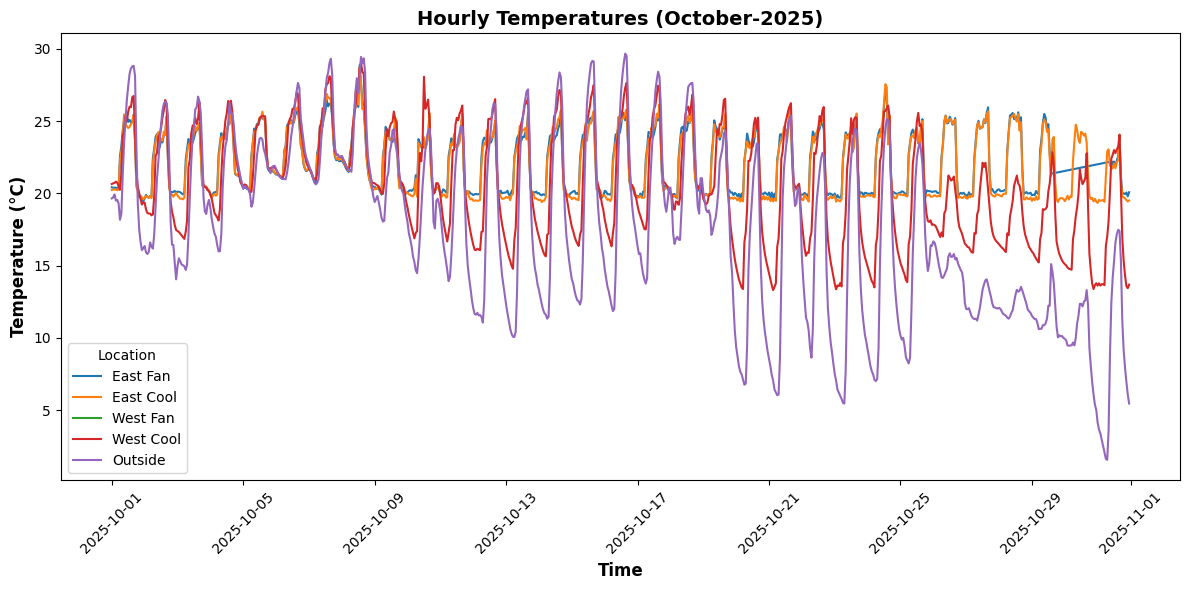

In [20]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_temperature, x='Date', y='Temperature_Value', hue='Location')
plt.title('Hourly Temperatures (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

## Average temperature in East & West side

In [21]:
# Filter
temperature_east_fan = melted_temperature[melted_temperature['Location'] == 'East Fan']
temperature_east_cool = melted_temperature[melted_temperature['Location'] == 'East Cool']
temperature_west_fan = melted_temperature[melted_temperature['Location'] == 'West Fan']
temperature_west_cool = melted_temperature[melted_temperature['Location'] == 'West Cool']

# Combine the two DataFrames
combined_east_temperature = pd.concat([temperature_east_fan, temperature_east_cool])
combined_west_temperature = pd.concat([temperature_west_fan, temperature_west_cool])

# Average the temperatures by Date
averaged_temperatures_east = combined_east_temperature.groupby('Date').agg({'Temperature_Value': 'mean'})
averaged_temperatures_west = combined_west_temperature.groupby('Date').agg({'Temperature_Value': 'mean'})

# Display hourly average temperature data
print(averaged_temperatures_east)

                     Temperature_Value
Date                                  
2025-10-01 00:00:00          20.329833
2025-10-01 01:00:00          20.325583
2025-10-01 02:00:00          20.327000
2025-10-01 03:00:00          20.328917
2025-10-01 04:00:00          20.291917
...                                ...
2025-10-31 19:00:00          19.861917
2025-10-31 20:00:00          19.801167
2025-10-31 21:00:00          19.806083
2025-10-31 22:00:00          19.617083
2025-10-31 23:00:00          19.793083

[744 rows x 1 columns]


In [23]:
# Create a new Excel file with both datasets in separate sheets
output_file_temperature = "/content/Oct-25_temperature.xlsx"

with pd.ExcelWriter(output_file_temperature) as writer:
  hourly_temperature_EF.to_excel(writer, sheet_name='East fan')
  hourly_temperature_EC.to_excel(writer, sheet_name='East cool')
  averaged_temperatures_east.to_excel(writer, sheet_name='Average East')
  hourly_temperature_WF.to_excel(writer, sheet_name='West fan')
  hourly_temperature_WC.to_excel(writer, sheet_name='West cool')
  averaged_temperatures_west.to_excel(writer, sheet_name='Average West')
  hourly_temperature_out.to_excel(writer, sheet_name='Outside')

## Plotting using Average Temperature data

In [32]:
# Load the data from the Excel file
file_path_temperature = "/content/Oct-25_temperature.xlsx"
temperature_east_avg = pd.read_excel(file_path_temperature, sheet_name='Average East')
temperature_west_avg = pd.read_excel(file_path_temperature, sheet_name='Average West')

# Rename date columns for consistency
temperature_east_avg.rename(columns={'Date': 'Date', 'Temperature_Value': 'Temperature'}, inplace=True)
temperature_west_avg.rename(columns={'Date': 'Date', 'Temperature_Value': 'Temperature'}, inplace=True)

# Add a Location column to each DataFrame
temperature_east_avg['Location'] = 'East Temperature'
temperature_west_avg['Location'] = 'West Temperature'

# Combine the data
combined_temperature1 = pd.concat([
    temperature_east_avg,
    temperature_west_avg,
    outside_temperature
    ], ignore_index=True)

print(combined_temperature1.head())

                 Date  Temperature          Location
0 2025-10-01 00:00:00    20.329833  East Temperature
1 2025-10-01 01:00:00    20.325583  East Temperature
2 2025-10-01 02:00:00    20.327000  East Temperature
3 2025-10-01 03:00:00    20.328917  East Temperature
4 2025-10-01 04:00:00    20.291917  East Temperature


In [33]:
# Reshape the data to long format
melted_temperature1 = pd.melt(combined_temperature1,
                      id_vars=['Location', 'Date'],
                      value_vars=['Temperature'],
                      var_name='Temperature_Type',  # This can be kept as-is
                      value_name='Temperature_Value')  # Changed from 'Temperature' to

melted_temperature1.head()

,Location,Date,Temperature_Type,Temperature_Value
0,East Temperature,2025-10-01 00:00:00,Temperature,20.329833
1,East Temperature,2025-10-01 01:00:00,Temperature,20.325583
2,East Temperature,2025-10-01 02:00:00,Temperature,20.327000
3,East Temperature,2025-10-01 03:00:00,Temperature,20.328917
4,East Temperature,2025-10-01 04:00:00,Temperature,20.291917


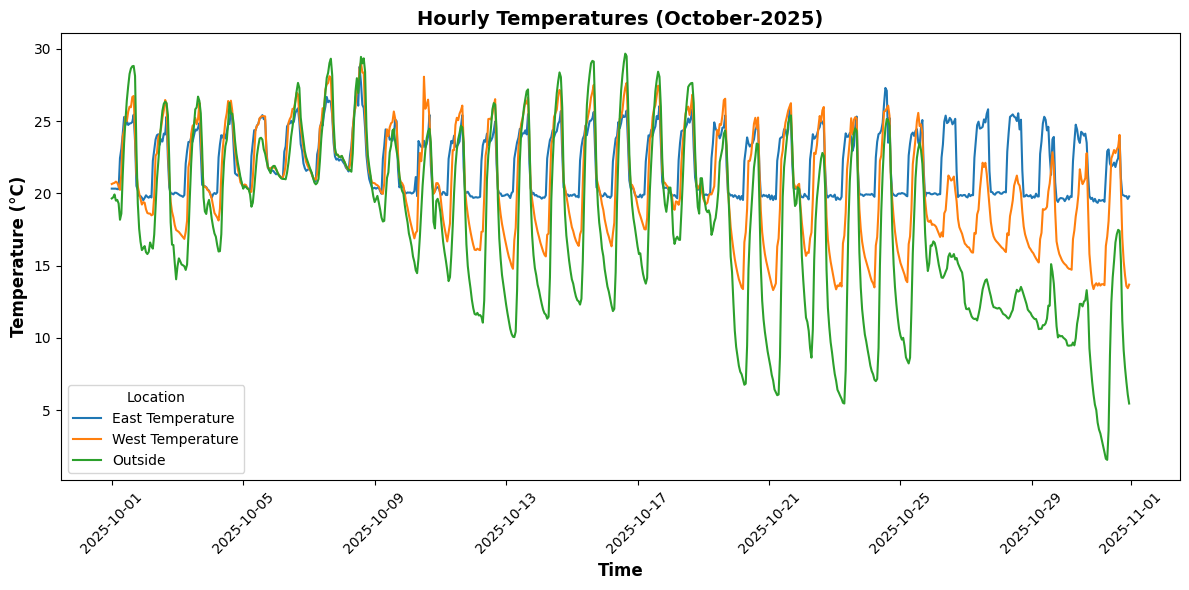

In [34]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_temperature1, x='Date', y='Temperature_Value', hue='Location')
plt.title('Hourly Temperatures (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

## PPFD Plotting

In [35]:
# Load the data from the Excel file PPFD
file_path_PPFD = "/content/Oct-25_PPFD.xlsx"
east_fan_PPFD = pd.read_excel(file_path_PPFD, sheet_name='East fan')
east_cool_PPFD = pd.read_excel(file_path_PPFD, sheet_name='East cool')
west_fan_PPFD = pd.read_excel(file_path_PPFD, sheet_name='West fan')
west_cool_PPFD = pd.read_excel(file_path_PPFD, sheet_name='West cool')
outside_PPFD = pd.read_excel(file_path_PPFD, sheet_name='Outside')

# Rename date columns for consistency
east_fan_PPFD.rename(columns={'Date_EF': 'Date', 'PPFD_EF': 'PPFD'}, inplace=True)
east_cool_PPFD.rename(columns={'Date_EC': 'Date', 'PPFD_EC': 'PPFD'}, inplace=True)
west_fan_PPFD.rename(columns={'Date_WF': 'Date', 'PPFD_WF': 'PPFD'}, inplace=True)
west_cool_PPFD.rename(columns={'Date_WC': 'Date', 'PPFD_WC': 'PPFD'}, inplace=True)
outside_PPFD.rename(columns={'time': 'Date', 'PPFD_out': 'PPFD'}, inplace=True)

# Add a Location column to each DataFrame
east_fan_PPFD['Location'] = 'East Fan'
east_cool_PPFD['Location'] = 'East Cool'
west_fan_PPFD['Location'] = 'West Fan'
west_cool_PPFD['Location'] = 'West Cool'
outside_PPFD['Location'] = 'Outside'

# Combine the data
combined_PPFD = pd.concat([
    east_fan_PPFD,
    east_cool_PPFD,
    west_fan_PPFD,
    west_cool_PPFD,
    outside_PPFD
    ], ignore_index=True)

# Reshape the data to long format
melted_PPFD = pd.melt(combined_PPFD,
                      id_vars=['Location', 'Date'],
                      value_vars=['PPFD'],
                      var_name='PPFD_Type',  # This can be kept as-is
                      value_name='PPFD_Value')  # Changed from 'PPFD' to

melted_PPFD.head()

,Location,Date,PPFD_Type,PPFD_Value
0,East Fan,2025-10-01 00:00:00,PPFD,0.0
1,East Fan,2025-10-01 01:00:00,PPFD,0.0
2,East Fan,2025-10-01 02:00:00,PPFD,0.0
3,East Fan,2025-10-01 03:00:00,PPFD,0.0
4,East Fan,2025-10-01 04:00:00,PPFD,0.0


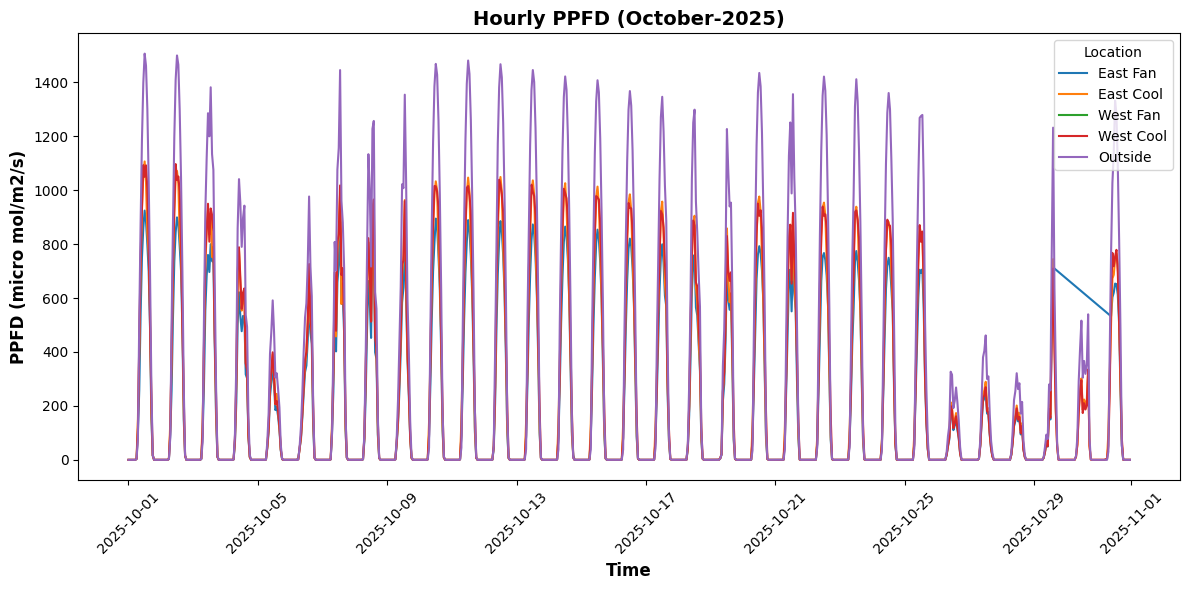

In [36]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_PPFD, x='Date', y='PPFD_Value', hue='Location')
plt.title('Hourly PPFD (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('PPFD (micro mol/m2/s)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

## Average PPFD of East & West side

In [37]:
# Filter
PPFD_east_fan = melted_PPFD[melted_PPFD['Location'] == 'East Fan']
PPFD_east_cool = melted_PPFD[melted_PPFD['Location'] == 'East Cool']
PPFD_west_fan = melted_PPFD[melted_PPFD['Location'] == 'West Fan']
PPFD_west_cool = melted_PPFD[melted_PPFD['Location'] == 'West Cool']

# Combine the two DataFrames
combined_east_PPFD = pd.concat([PPFD_east_fan, PPFD_east_cool])
combined_west_PPFD = pd.concat([PPFD_west_fan, PPFD_west_cool])

# Average the PPFD by Date
averaged_PPFD_east = combined_east_PPFD.groupby('Date').agg({'PPFD_Value': 'mean'})
averaged_PPFD_west = combined_west_PPFD.groupby('Date').agg({'PPFD_Value': 'mean'})

# Display hourly average PPFD data
print(averaged_PPFD_east)

                     PPFD_Value
Date                           
2025-10-01 00:00:00         0.0
2025-10-01 01:00:00         0.0
2025-10-01 02:00:00         0.0
2025-10-01 03:00:00         0.0
2025-10-01 04:00:00         0.0
...                         ...
2025-10-31 19:00:00         0.0
2025-10-31 20:00:00         0.0
2025-10-31 21:00:00         0.0
2025-10-31 22:00:00         0.0
2025-10-31 23:00:00         0.0

[744 rows x 1 columns]


In [38]:
# Create a new Excel file with both datasets in separate sheets
output_file_PPFD = "/content/Oct-25_PPFD.xlsx"

with pd.ExcelWriter(output_file_PPFD) as writer:
  hourly_PPFD_EF.to_excel(writer, sheet_name='East fan')
  hourly_PPFD_EC.to_excel(writer, sheet_name='East cool')
  averaged_PPFD_east.to_excel(writer, sheet_name='Average East')
  hourly_PPFD_WF.to_excel(writer, sheet_name='West fan')
  hourly_PPFD_WC.to_excel(writer, sheet_name='West cool')
  averaged_PPFD_west.to_excel(writer, sheet_name='Average West')
  hourly_PPFD_out.to_excel(writer, sheet_name='Outside')

In [39]:
# Load the data from the Excel file
file_path_PPFD = "/content/Oct-25_PPFD.xlsx"
PPFD_east_avg = pd.read_excel(file_path_PPFD, sheet_name='Average East')
PPFD_west_avg = pd.read_excel(file_path_PPFD, sheet_name='Average West')

# Rename date columns for consistency
PPFD_east_avg.rename(columns={'Date': 'Date', 'PPFD_Value': 'PPFD'}, inplace=True)
PPFD_west_avg.rename(columns={'Date': 'Date', 'PPFD_Value': 'PPFD'}, inplace=True)

# Add a Location column to each DataFrame
PPFD_east_avg['Location'] = 'East PPFD'
PPFD_west_avg['Location'] = 'West PPFD'

# Combine the data
combined_PPFD1 = pd.concat([
    PPFD_east_avg,
    PPFD_west_avg,
    outside_PPFD
    ], ignore_index=True)

# Reshape the data to long format
melted_PPFD1 = pd.melt(combined_PPFD1,
                      id_vars=['Location', 'Date'],
                      value_vars=['PPFD'],
                      var_name='PPFD_Type',  # This can be kept as-is
                      value_name='PPFD_Value')  # Changed from 'PPFD' to

melted_PPFD1.head()

,Location,Date,PPFD_Type,PPFD_Value
0,East PPFD,2025-10-01 00:00:00,PPFD,0.0
1,East PPFD,2025-10-01 01:00:00,PPFD,0.0
2,East PPFD,2025-10-01 02:00:00,PPFD,0.0
3,East PPFD,2025-10-01 03:00:00,PPFD,0.0
4,East PPFD,2025-10-01 04:00:00,PPFD,0.0


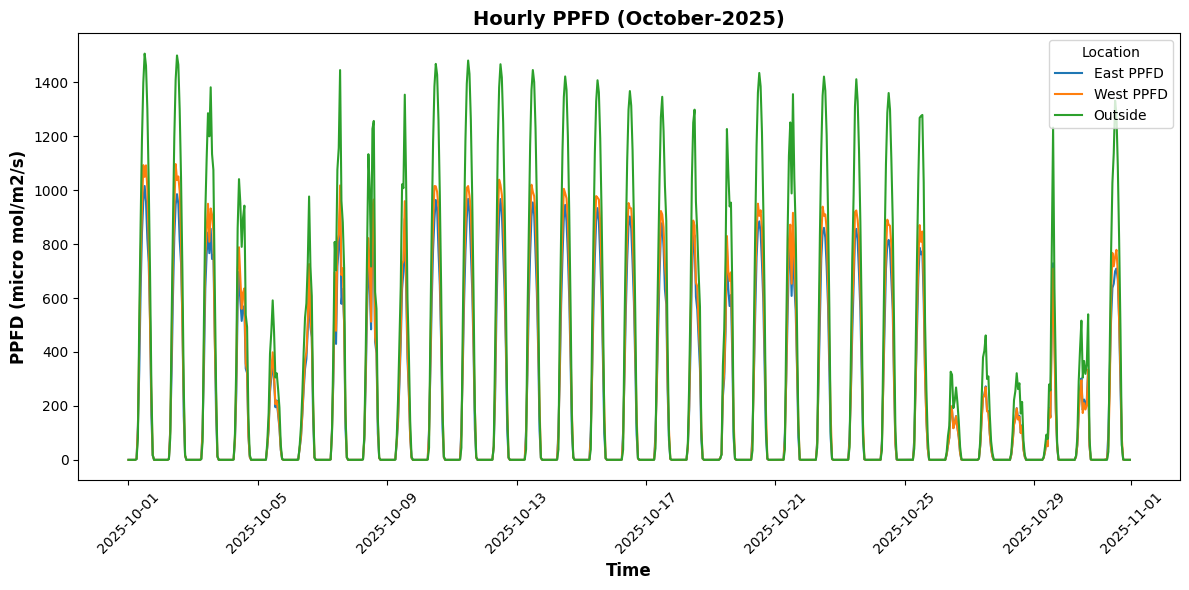

In [40]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_PPFD1, x='Date', y='PPFD_Value', hue='Location')
plt.title('Hourly PPFD (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('PPFD (micro mol/m2/s)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

### VPD Plotting ###

In [ ]:
# Load the data from the Excel file VPD
file_path_VPD = "/content/Oct-25_VPD.xlsx"
east_fan_VPD = pd.read_excel(file_path_VPD, sheet_name='East fan')
east_cool_VPD = pd.read_excel(file_path_VPD, sheet_name='East cool')
west_fan_VPD = pd.read_excel(file_path_VPD, sheet_name='West fan')
west_cool_VPD = pd.read_excel(file_path_VPD, sheet_name='West cool')
outside_VPD = pd.read_excel(file_path_VPD, sheet_name='Outside')

# Rename date columns for consistency
east_fan_VPD.rename(columns={'Date_EF': 'Date', 'VPD_EF': 'VPD'}, inplace=True)
east_cool_VPD.rename(columns={'Date_EC': 'Date', 'VPD_EC': 'VPD'}, inplace=True)
west_fan_VPD.rename(columns={'Date_WF': 'Date', 'VPD_WF': 'VPD'}, inplace=True)
west_cool_VPD.rename(columns={'Date_WC': 'Date', 'VPD_WC': 'VPD'}, inplace=True)
outside_VPD.rename(columns={'time': 'Date', 'VPD_out': 'VPD'}, inplace=True)

# Add a Location column to each DataFrame
east_fan_VPD['Location'] = 'East Fan'
east_cool_VPD['Location'] = 'East Cool'
west_fan_VPD['Location'] = 'West Fan'
west_cool_VPD['Location'] = 'West Cool'
outside_VPD['Location'] = 'Outside'

# Combine the data
combined_VPD = pd.concat([
    east_fan_VPD,
    east_cool_VPD,
    west_fan_VPD,
    west_cool_VPD,
    outside_VPD
    ], ignore_index=True)

# Reshape the data to long format
melted_VPD = pd.melt(combined_VPD,
                      id_vars=['Location', 'Date'],
                      value_vars=['VPD'],
                      var_name='VPD_Type',  # This can be kept as-is
                      value_name='VPD_Value')  # Changed from 'VPD' to

melted_VPD.head()

,Location,Date,VPD_Type,VPD_Value
0,East Fan,2025-10-01 00:00:00,VPD,0.035000
1,East Fan,2025-10-01 01:00:00,VPD,0.037333
2,East Fan,2025-10-01 02:00:00,VPD,0.034500
3,East Fan,2025-10-01 03:00:00,VPD,0.054500
4,East Fan,2025-10-01 04:00:00,VPD,0.045333


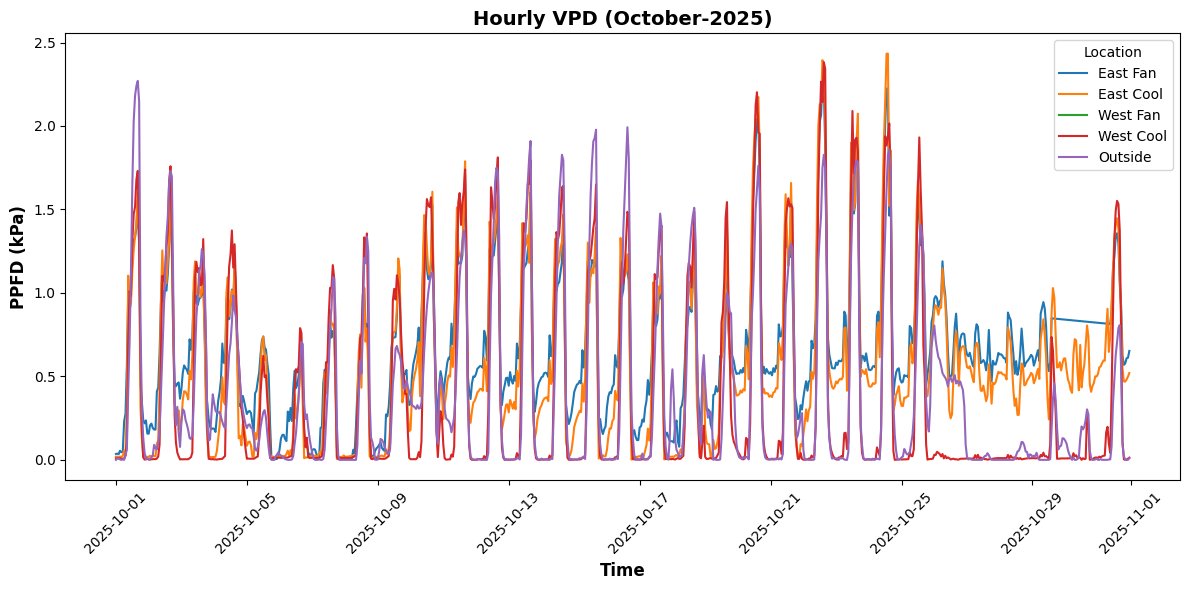

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_VPD, x='Date', y='VPD_Value', hue='Location')
plt.title('Hourly VPD (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('PPFD (kPa)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

## Average VPD of East and West side

In [ ]:
# Filter
VPD_east_fan = melted_VPD[melted_VPD['Location'] == 'East Fan']
VPD_east_cool = melted_VPD[melted_VPD['Location'] == 'East Cool']
VPD_west_fan = melted_VPD[melted_VPD['Location'] == 'West Fan']
VPD_west_cool = melted_VPD[melted_VPD['Location'] == 'West Cool']

# Combine the two DataFrames
combined_east_VPD = pd.concat([VPD_east_fan, VPD_east_cool])
combined_west_VPD = pd.concat([VPD_west_fan, VPD_west_cool])

# Average the VPD by Date
averaged_VPD_east = combined_east_VPD.groupby('Date').agg({'VPD_Value': 'mean'})
averaged_VPD_west = combined_west_VPD.groupby('Date').agg({'VPD_Value': 'mean'})

# Display hourly average VPD data
print(averaged_VPD_east)

                     VPD_Value
Date                          
2025-10-01 00:00:00   0.026333
2025-10-01 01:00:00   0.028167
2025-10-01 02:00:00   0.026500
2025-10-01 03:00:00   0.036833
2025-10-01 04:00:00   0.032167
...                        ...
2025-10-31 19:00:00   0.519500
2025-10-31 20:00:00   0.523083
2025-10-31 21:00:00   0.545000
2025-10-31 22:00:00   0.555167
2025-10-31 23:00:00   0.586500

[744 rows x 1 columns]


In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_VPD = "/content/Oct-25_VPD.xlsx"

with pd.ExcelWriter(output_file_VPD) as writer:
  hourly_VPD_EF.to_excel(writer, sheet_name='East fan')
  hourly_VPD_EC.to_excel(writer, sheet_name='East cool')
  averaged_VPD_east.to_excel(writer, sheet_name='Average East')
  hourly_VPD_WF.to_excel(writer, sheet_name='West fan')
  hourly_VPD_WC.to_excel(writer, sheet_name='West cool')
  averaged_VPD_west.to_excel(writer, sheet_name='Average West')
  hourly_VPD_out.to_excel(writer, sheet_name='Outside')

In [ ]:
# Load the data from the Excel file
file_path_VPD = "/content/Oct-25_VPD.xlsx"
VPD_east_avg = pd.read_excel(file_path_VPD, sheet_name='Average East')
VPD_west_avg = pd.read_excel(file_path_VPD, sheet_name='Average West')

# Rename date columns for consistency
VPD_east_avg.rename(columns={'Date': 'Date', 'VPD_Value': 'VPD'}, inplace=True)
VPD_west_avg.rename(columns={'Date': 'Date', 'VPD_Value': 'VPD'}, inplace=True)

# Add a Location column to each DataFrame
VPD_east_avg['Location'] = 'East Avg VPD'
VPD_west_avg['Location'] = 'West Avg VPD'

# Combine the data
combined_VPD1 = pd.concat([
    VPD_east_avg,
    VPD_west_avg,
    outside_VPD
    ], ignore_index=True)

# Reshape the data to long format
melted_VPD1 = pd.melt(combined_VPD1,
                      id_vars=['Location', 'Date'],
                      value_vars=['VPD'],
                      var_name='VPD_Type',  # This can be kept as-is
                      value_name='VPD_Value')  # Changed from 'VPD' to

melted_VPD1.head()

,Location,Date,VPD_Type,VPD_Value
0,East Avg VPD,2025-10-01 00:00:00,VPD,0.026333
1,East Avg VPD,2025-10-01 01:00:00,VPD,0.028167
2,East Avg VPD,2025-10-01 02:00:00,VPD,0.026500
3,East Avg VPD,2025-10-01 03:00:00,VPD,0.036833
4,East Avg VPD,2025-10-01 04:00:00,VPD,0.032167


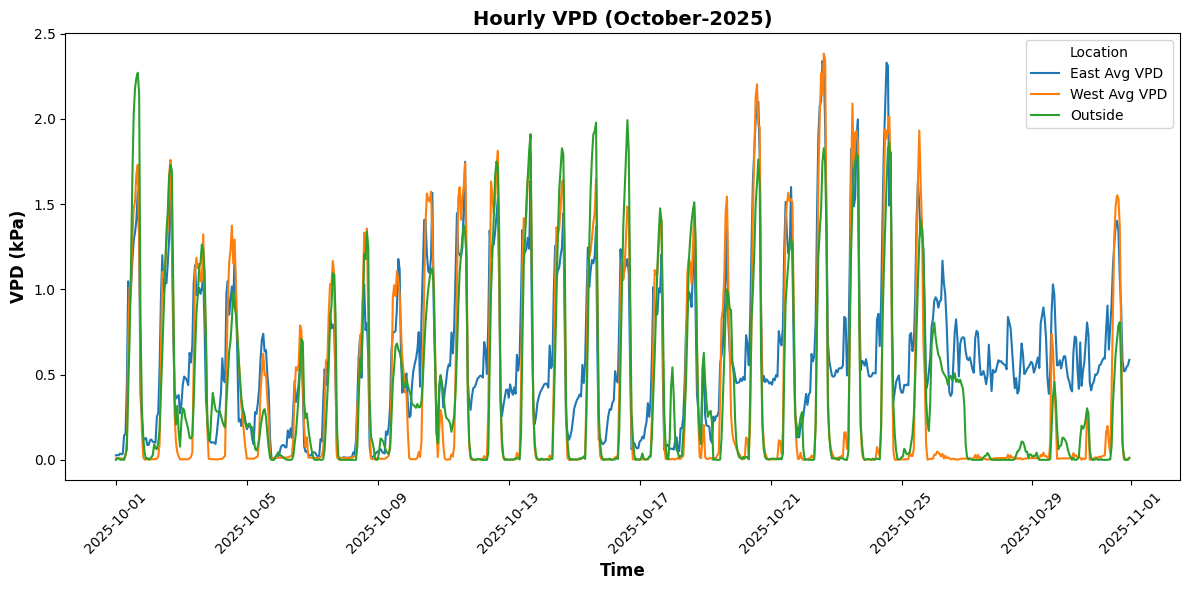

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_VPD1, x='Date', y='VPD_Value', hue='Location')
plt.title('Hourly VPD (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('VPD (kPa)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

### Pressure Plotting ###

In [ ]:
# Load the data from the Excel file Pressure
file_path_pressure = "/content/Oct-25_pressure.xlsx"
east_fan_pressure = pd.read_excel(file_path_pressure, sheet_name='East fan')
east_cool_pressure = pd.read_excel(file_path_pressure, sheet_name='East cool')
west_fan_pressure = pd.read_excel(file_path_pressure, sheet_name='West fan')
west_cool_pressure = pd.read_excel(file_path_pressure, sheet_name='West cool')
outside_pressure = pd.read_excel(file_path_pressure, sheet_name='Outside')

# Rename date columns for consistency
east_fan_pressure.rename(columns={'Date_EF': 'Date', 'Pressure_EF': 'Pressure'}, inplace=True)
east_cool_pressure.rename(columns={'Date_EC': 'Date', 'Pressure_EC': 'Pressure'}, inplace=True)
west_fan_pressure.rename(columns={'Date_WF': 'Date', 'Pressure_WF': 'Pressure'}, inplace=True)
west_cool_pressure.rename(columns={'Date_WC': 'Date', 'Pressure_WC': 'Pressure'}, inplace=True)
outside_pressure.rename(columns={'time': 'Date', 'Pressure_out': 'Pressure'}, inplace=True)

# Add a Location column to each DataFrame
east_fan_pressure['Location'] = 'East Fan'
east_cool_pressure['Location'] = 'East Cool'
west_fan_pressure['Location'] = 'West Fan'
west_cool_pressure['Location'] = 'West Cool'
outside_pressure['Location'] = 'Outside'

# Combine the data
combined_pressure = pd.concat([
    east_fan_pressure,
    east_cool_pressure,

    west_cool_pressure,
    outside_pressure
    ], ignore_index=True)

print("Columns in Combined Data:", combined_pressure.columns.tolist())

# Reshape the data to long format
melted_pressure = pd.melt(combined_pressure,
                      id_vars=['Location', 'Date'],
                      value_vars=['Pressure'],
                      var_name='Pressure_Type',  # This can be kept as-is
                      value_name='Pressure_Value')  # Changed from 'pressure' to

melted_pressure.head()

In [ ]:
# Load the data from the Excel file Pressure
file_path_pressure = "/content/Oct-25_pressure.xlsx"
east_fan_pressure = pd.read_excel(file_path_pressure, sheet_name='East fan')
east_cool_pressure = pd.read_excel(file_path_pressure, sheet_name='East cool')
west_fan_pressure = pd.read_excel(file_path_pressure, sheet_name='West fan')
west_cool_pressure = pd.read_excel(file_path_pressure, sheet_name='West cool')
outside_pressure = pd.read_excel(file_path_pressure, sheet_name='Outside')

# Rename date columns for consistency
east_fan_pressure.rename(columns={'Date_EF': 'Date', 'Pressure_EF': 'Pressure'}, inplace=True)
east_cool_pressure.rename(columns={'Date_EC': 'Date', 'Pressure_EC': 'Pressure'}, inplace=True)
west_fan_pressure.rename(columns={'Date_WF': 'Date', 'Pressure_WF': 'Pressure'}, inplace=True)
west_cool_pressure.rename(columns={'Date_WC': 'Date', 'Pressure_WC': 'Pressure'}, inplace=True)
outside_pressure.rename(columns={'time': 'Date', 'Pressure_out': 'Pressure'}, inplace=True)

# Add a Location column to each DataFrame
east_fan_pressure['Location'] = 'East Fan'
east_cool_pressure['Location'] = 'East Cool'
west_fan_pressure['Location'] = 'West Fan'
west_cool_pressure['Location'] = 'West Cool'
outside_pressure['Location'] = 'Outside'

# Combine the data
combined_pressure = pd.concat([
    east_fan_pressure,
    east_cool_pressure,
    west_fan_pressure,
    west_cool_pressure,
    outside_pressure
    ], ignore_index=True)

print("Columns in Combined Data:", combined_pressure.columns.tolist())

# Reshape the data to long format
melted_pressure = pd.melt(combined_pressure,
                      id_vars=['Location', 'Date'],
                      value_vars=['Pressure'],
                      var_name='Pressure_Type',  # This can be kept as-is
                      value_name='Pressure_Value')  # Changed from 'pressure' to

melted_pressure.head()

Columns in Combined Data: ['Date', 'Pressure', 'Location']


,Location,Date,Pressure_Type,Pressure_Value
0,East Fan,2025-10-01 00:00:00,Pressure,99.517833
1,East Fan,2025-10-01 01:00:00,Pressure,99.515000
2,East Fan,2025-10-01 02:00:00,Pressure,99.514000
3,East Fan,2025-10-01 03:00:00,Pressure,99.529667
4,East Fan,2025-10-01 04:00:00,Pressure,99.545667


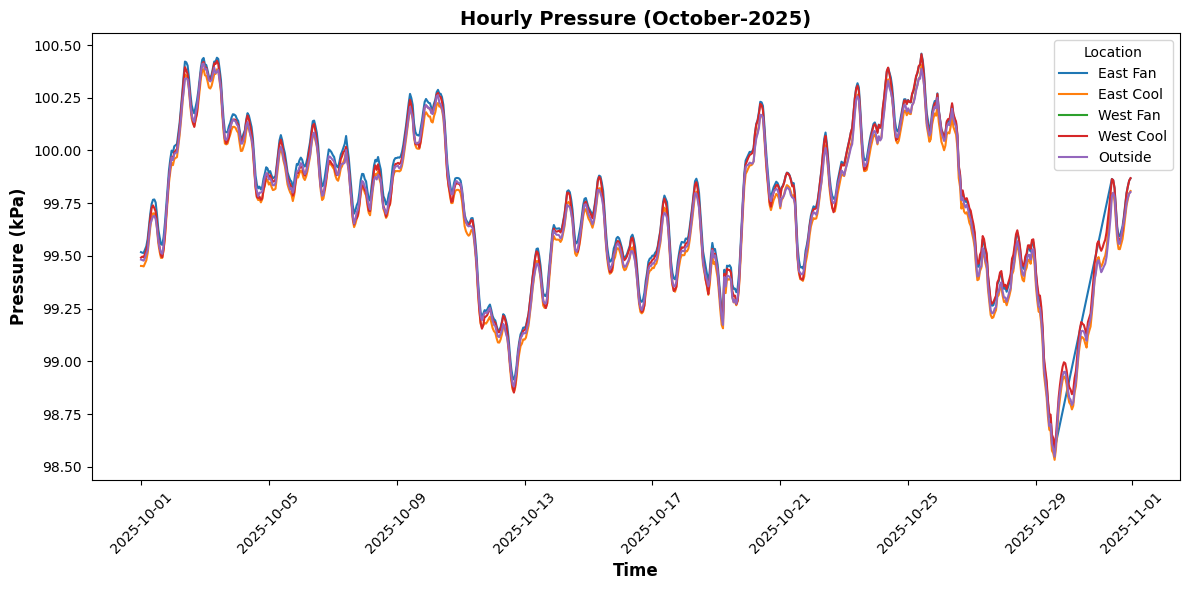

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_pressure, x='Date', y='Pressure_Value', hue='Location')
plt.title('Hourly Pressure (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Pressure (kPa)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

## Average Pressure of East & West side

In [ ]:
# Filter
pressure_east_fan = melted_pressure[melted_pressure['Location'] == 'East Fan']
pressure_east_cool = melted_pressure[melted_pressure['Location'] == 'East Cool']
pressure_west_fan = melted_pressure[melted_pressure['Location'] == 'West Fan']
pressure_west_cool = melted_pressure[melted_pressure['Location'] == 'West Cool']

# Combine the two DataFrames
combined_east_pressure = pd.concat([pressure_east_fan, pressure_east_cool])
combined_west_pressure = pd.concat([pressure_west_fan, pressure_west_cool])

# Average the pressure by Date
averaged_pressure_east = combined_east_pressure.groupby('Date').agg({'Pressure_Value': 'mean'})
averaged_pressure_west = combined_east_pressure.groupby('Date').agg({'Pressure_Value': 'mean'})

# Display hourly average pressure data
print(averaged_pressure_east)

                     Pressure_Value
Date                               
2025-10-01 00:00:00       99.485083
2025-10-01 01:00:00       99.483500
2025-10-01 02:00:00       99.481917
2025-10-01 03:00:00       99.496833
2025-10-01 04:00:00       99.512333
...                             ...
2025-10-31 19:00:00       99.711417
2025-10-31 20:00:00       99.768083
2025-10-31 21:00:00       99.800083
2025-10-31 22:00:00       99.827500
2025-10-31 23:00:00       99.837667

[744 rows x 1 columns]


In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_pressure = "/content/Oct-25_pressure.xlsx"

with pd.ExcelWriter(output_file_pressure) as writer:
  hourly_pressure_EF.to_excel(writer, sheet_name='East fan')
  hourly_pressure_EC.to_excel(writer, sheet_name='East cool')
  averaged_pressure_east.to_excel(writer, sheet_name='Average East')
  hourly_pressure_WF.to_excel(writer, sheet_name='West fan')
  hourly_pressure_WC.to_excel(writer, sheet_name='West cool')
  averaged_pressure_west.to_excel(writer, sheet_name='Average West')
  hourly_pressure_out.to_excel(writer, sheet_name='Outside')

In [ ]:
# Load the data from the Excel file
file_path_pressure = "/content/Oct-25_pressure.xlsx"
pressure_east_avg = pd.read_excel(file_path_pressure, sheet_name='Average East')
pressure_west_avg = pd.read_excel(file_path_pressure, sheet_name='Average West')

# Rename date columns for consistency
pressure_east_avg.rename(columns={'Date': 'Date', 'Pressure_Value': 'Pressure'}, inplace=True)
pressure_west_avg.rename(columns={'Date': 'Date', 'Pressure_Value': 'Pressure'}, inplace=True)

# Add a Location column to each DataFrame
pressure_east_avg['Location'] = 'East Avg Pressure'
pressure_west_avg['Location'] = 'West Avg Pressure'

# Combine the data
combined_pressure1 = pd.concat([
    pressure_east_avg,
    pressure_west_avg,
    outside_pressure
    ], ignore_index=True)

print("Columns in Combined Data:", combined_pressure1.columns.tolist())

# Reshape the data to long format
melted_pressure1 = pd.melt(combined_pressure1,
                      id_vars=['Location', 'Date'],
                      value_vars=['Pressure'],
                      var_name='Pressure_Type',  # This can be kept as-is
                      value_name='Pressure_Value')  # Changed from 'Pressure' to

melted_pressure1.head()

Columns in Combined Data: ['Date', 'Pressure', 'Location']


,Location,Date,Pressure_Type,Pressure_Value
0,East Avg Pressure,2025-10-01 00:00:00,Pressure,99.485083
1,East Avg Pressure,2025-10-01 01:00:00,Pressure,99.483500
2,East Avg Pressure,2025-10-01 02:00:00,Pressure,99.481917
3,East Avg Pressure,2025-10-01 03:00:00,Pressure,99.496833
4,East Avg Pressure,2025-10-01 04:00:00,Pressure,99.512333


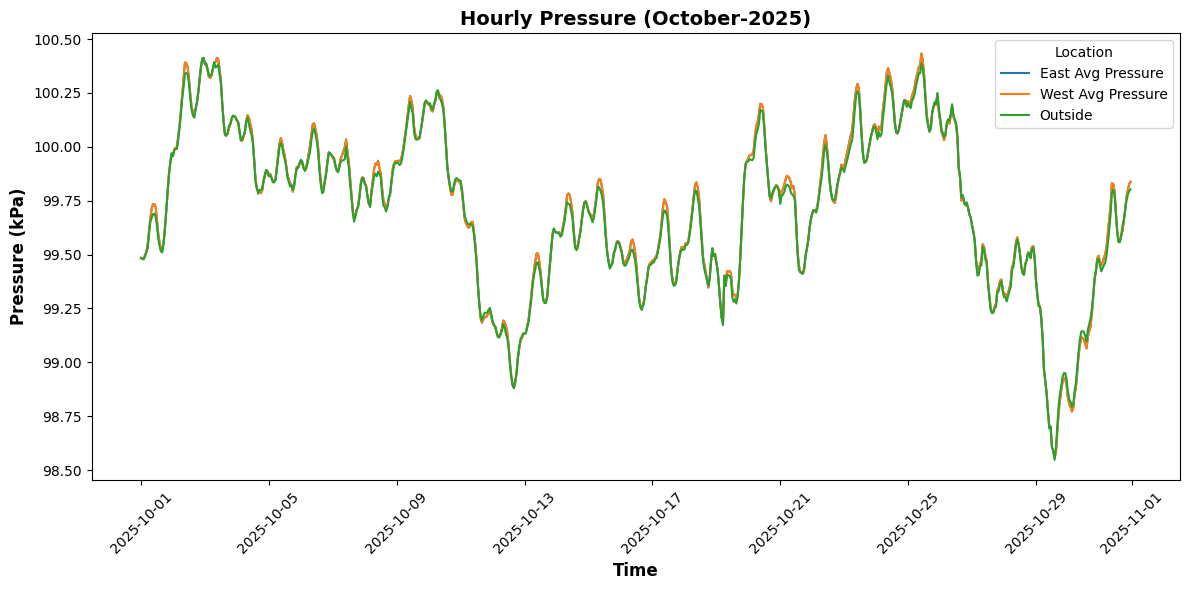

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_pressure1, x='Date', y='Pressure_Value', hue='Location')
plt.title('Hourly Pressure (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Pressure (kPa)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

### Humidity Plotting ###

In [ ]:
# Load the data from the Excel file Humidity
file_path_humidity = "/content/Oct-25_humidity.xlsx"
east_fan_humidity = pd.read_excel(file_path_humidity, sheet_name='East fan')
east_cool_humidity = pd.read_excel(file_path_humidity, sheet_name='East cool')
west_fan_humidity = pd.read_excel(file_path_humidity, sheet_name='West fan')
west_cool_humidity = pd.read_excel(file_path_humidity, sheet_name='West cool')

# Rename date columns for consistency
east_fan_humidity.rename(columns={'Date_EF': 'Date', 'Humidity_EF': 'Humidity'}, inplace=True)
east_cool_humidity.rename(columns={'Date_EC': 'Date', 'Humidity_EC': 'Humidity'}, inplace=True)
west_fan_humidity.rename(columns={'Date_WF': 'Date', 'Humidity_WF': 'Humidity'}, inplace=True)
west_cool_humidity.rename(columns={'Date_WC': 'Date', 'Humidity_WC': 'Humidity'}, inplace=True)

# Add a Location column to each DataFrame
east_fan_humidity['Location'] = 'East Fan'
east_cool_humidity['Location'] = 'East Cool'
west_fan_humidity['Location'] = 'West Fan'
west_cool_humidity['Location'] = 'West Cool'

# Combine the data
combined_humidity = pd.concat([
    east_fan_humidity,
    east_cool_humidity,
    west_fan_humidity,
    west_cool_humidity,
    ], ignore_index=True)

print("Columns in Combined Data:", combined_humidity.columns.tolist())

# Reshape the data to long format
melted_humidity = pd.melt(combined_humidity,
                      id_vars=['Location', 'Date'],
                      value_vars=['Humidity'],
                      var_name='Humidity_Type',  # This can be kept as-is
                      value_name='Humidity_Value')  # Changed from 'Humidity' to

melted_humidity.head()

Columns in Combined Data: ['Date', 'Humidity', 'Location']


,Location,Date,Humidity_Type,Humidity_Value
0,East Fan,2025-10-01 00:00:00,Humidity,98.546500
1,East Fan,2025-10-01 01:00:00,Humidity,98.453500
2,East Fan,2025-10-01 02:00:00,Humidity,98.566833
3,East Fan,2025-10-01 03:00:00,Humidity,97.727833
4,East Fan,2025-10-01 04:00:00,Humidity,98.102333


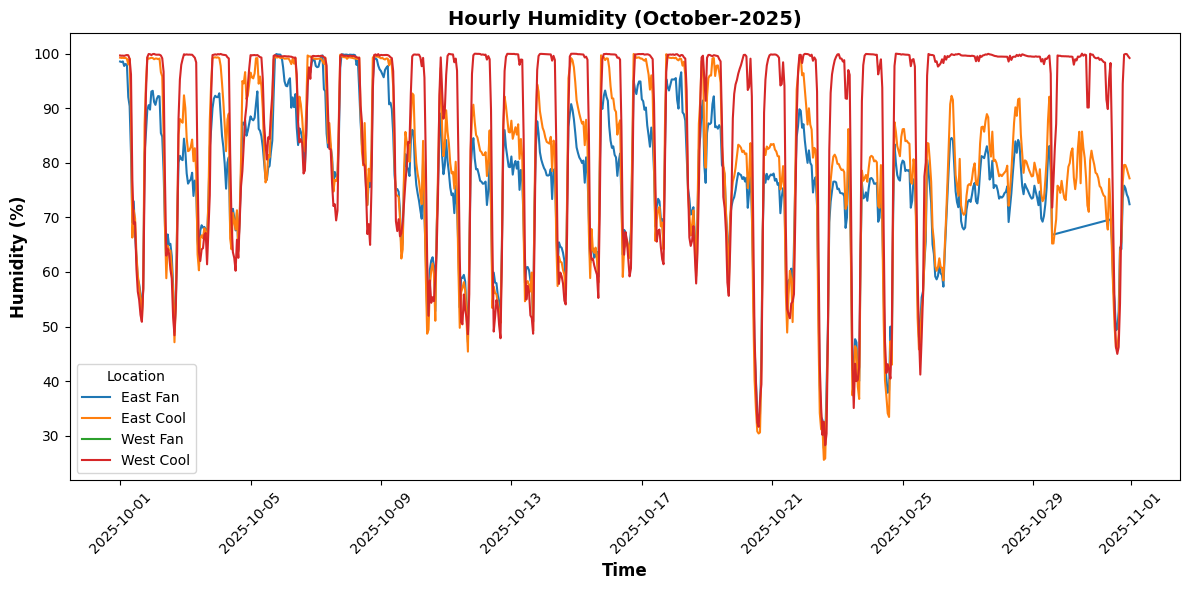

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_humidity, x='Date', y='Humidity_Value', hue='Location')
plt.title('Hourly Humidity (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Humidity (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

## Average Humidity of East & West side

In [ ]:
# Filter
humidity_east_fan = melted_humidity[melted_humidity['Location'] == 'East Fan']
humidity_east_cool = melted_humidity[melted_humidity['Location'] == 'East Cool']
humidity_west_fan = melted_humidity[melted_humidity['Location'] == 'West Fan']
humidity_west_cool = melted_humidity[melted_humidity['Location'] == 'West Cool']

# Combine the two DataFrames
combined_east_humidity = pd.concat([humidity_east_fan, humidity_east_cool])
combined_west_humidity = pd.concat([humidity_west_fan, humidity_west_cool])

# Average the Humidity by Date
averaged_humidity_east = combined_east_humidity.groupby('Date').agg({'Humidity_Value': 'mean'})
averaged_humidity_west = combined_west_humidity.groupby('Date').agg({'Humidity_Value': 'mean'})

# Display hourly average Humidity data
print(averaged_humidity_east)

                     Humidity_Value
Date                               
2025-10-01 00:00:00       98.900000
2025-10-01 01:00:00       98.828917
2025-10-01 02:00:00       98.895000
2025-10-01 03:00:00       98.458917
2025-10-01 04:00:00       98.653250
...                             ...
2025-10-31 19:00:00       77.709000
2025-10-31 20:00:00       77.441833
2025-10-31 21:00:00       76.546083
2025-10-31 22:00:00       75.798750
2025-10-31 23:00:00       74.772833

[744 rows x 1 columns]


In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_humidity = "/content/Oct-25_humidity.xlsx"

with pd.ExcelWriter(output_file_humidity) as writer:
  hourly_humidity_EF.to_excel(writer, sheet_name='East fan')
  hourly_humidity_EC.to_excel(writer, sheet_name='East cool')
  averaged_humidity_east.to_excel(writer, sheet_name='Average East')
  hourly_humidity_WF.to_excel(writer, sheet_name='West Fan')
  hourly_humidity_WC.to_excel(writer, sheet_name='West cool')
  averaged_humidity_west.to_excel(writer, sheet_name='Average West')

In [ ]:
# Load the data from the Excel file
file_path_humidity = "/content/Oct-25_humidity.xlsx"
humidity_east_avg = pd.read_excel(file_path_humidity, sheet_name='Average East')
humidity_west_avg = pd.read_excel(file_path_humidity, sheet_name='Average West')

# Rename date columns for consistency
humidity_east_avg.rename(columns={'Date': 'Date', 'Humidity_Value': 'Humidity'}, inplace=True)
humidity_west_avg.rename(columns={'Date': 'Date', 'Humidity_Value': 'Humidity'}, inplace=True)

# Add a Location column to each DataFrame
humidity_east_avg['Location'] = 'East Avg Humidity'
humidity_west_avg['Location'] = 'West Avg Humidity'

# Combine the data
combined_humidity1 = pd.concat([
    humidity_east_avg,
    humidity_west_avg,
    ], ignore_index=True)

print("Columns in Combined Data:", combined_humidity1.columns.tolist())

# Reshape the data to long format
melted_humidity1 = pd.melt(combined_humidity1,
                      id_vars=['Location', 'Date'],
                      value_vars=['Humidity'],
                      var_name='Humidity_Type',  # This can be kept as-is
                      value_name='Humidity_Value')  # Changed from 'Humidity' to

melted_humidity1.head()

Columns in Combined Data: ['Date', 'Humidity', 'Location']


,Location,Date,Humidity_Type,Humidity_Value
0,East Avg Humidity,2025-10-01 00:00:00,Humidity,98.900000
1,East Avg Humidity,2025-10-01 01:00:00,Humidity,98.828917
2,East Avg Humidity,2025-10-01 02:00:00,Humidity,98.895000
3,East Avg Humidity,2025-10-01 03:00:00,Humidity,98.458917
4,East Avg Humidity,2025-10-01 04:00:00,Humidity,98.653250


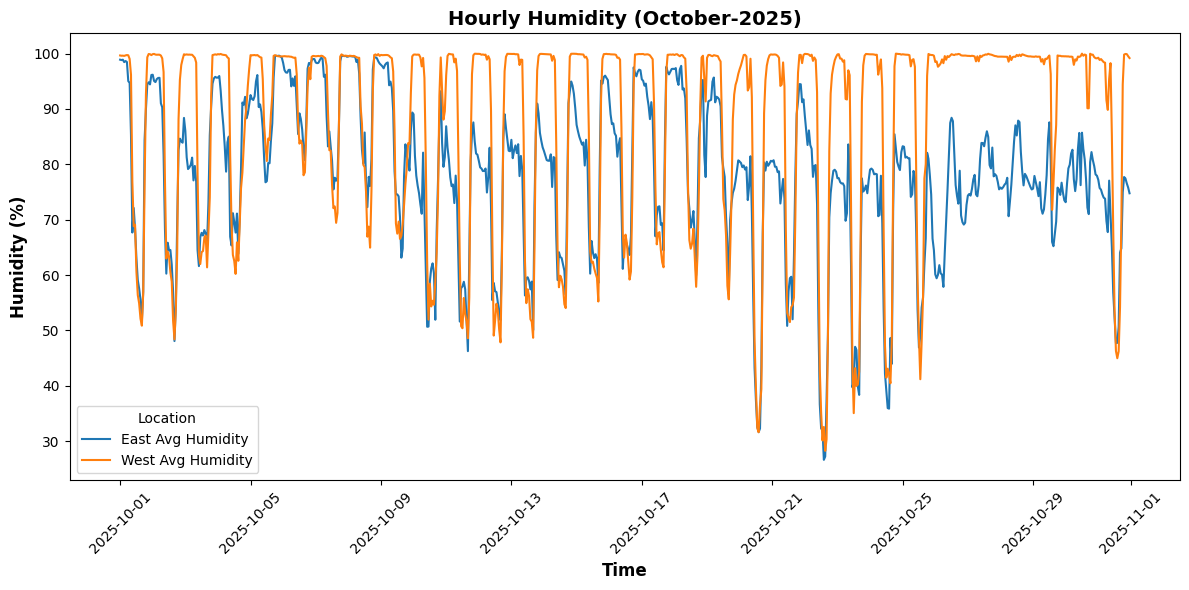

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_humidity1, x='Date', y='Humidity_Value', hue='Location')
plt.title('Hourly Humidity (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('Humidity (%)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

### CO2 Plotting

In [ ]:
# Load the data from the Excel file CO2
file_path_CO2 = "/content/Oct-25_CO2.xlsx"
east_fan_CO2 = pd.read_excel(file_path_CO2, sheet_name='East fan')
east_cool_CO2 = pd.read_excel(file_path_CO2, sheet_name='East cool')
west_fan_CO2 = pd.read_excel(file_path_CO2, sheet_name='West fan')
west_cool_CO2 = pd.read_excel(file_path_CO2, sheet_name='West cool')

# Rename date columns for consistency
east_fan_CO2.rename(columns={'Date_EF': 'Date', 'CO2_EF': 'CO2'}, inplace=True)
east_cool_CO2.rename(columns={'Date_EC': 'Date', 'CO2_EC': 'CO2'}, inplace=True)
west_fan_CO2.rename(columns={'Date_WF': 'Date', 'CO2_WF': 'CO2'}, inplace=True)
west_cool_CO2.rename(columns={'Date_WC': 'Date', 'CO2_WC': 'CO2'}, inplace=True)

# Add a Location column to each DataFrame
east_fan_CO2['Location'] = 'East Fan'
east_cool_CO2['Location'] = 'East Cool'
west_fan_CO2['Location'] = 'West Fan'
west_cool_CO2['Location'] = 'West Cool'

# Combine the data
combined_CO2 = pd.concat([
    east_fan_CO2,
    east_cool_CO2,
    west_fan_CO2,
    west_cool_CO2,
    ], ignore_index=True)

print("Columns in Combined Data:", combined_CO2.columns.tolist())

# Reshape the data to long format
melted_CO2 = pd.melt(combined_CO2,
                      id_vars=['Location', 'Date'],
                      value_vars=['CO2'],
                      var_name='CO2_Type',  # This can be kept as-is
                      value_name='CO2_Value')  # Changed from 'CO2' to

melted_CO2.head()

Columns in Combined Data: ['Date', 'CO2', 'Location']


,Location,Date,CO2_Type,CO2_Value
0,East Fan,2025-10-01 00:00:00,CO2,636.683333
1,East Fan,2025-10-01 01:00:00,CO2,639.333333
2,East Fan,2025-10-01 02:00:00,CO2,573.033333
3,East Fan,2025-10-01 03:00:00,CO2,592.500000
4,East Fan,2025-10-01 04:00:00,CO2,598.583333


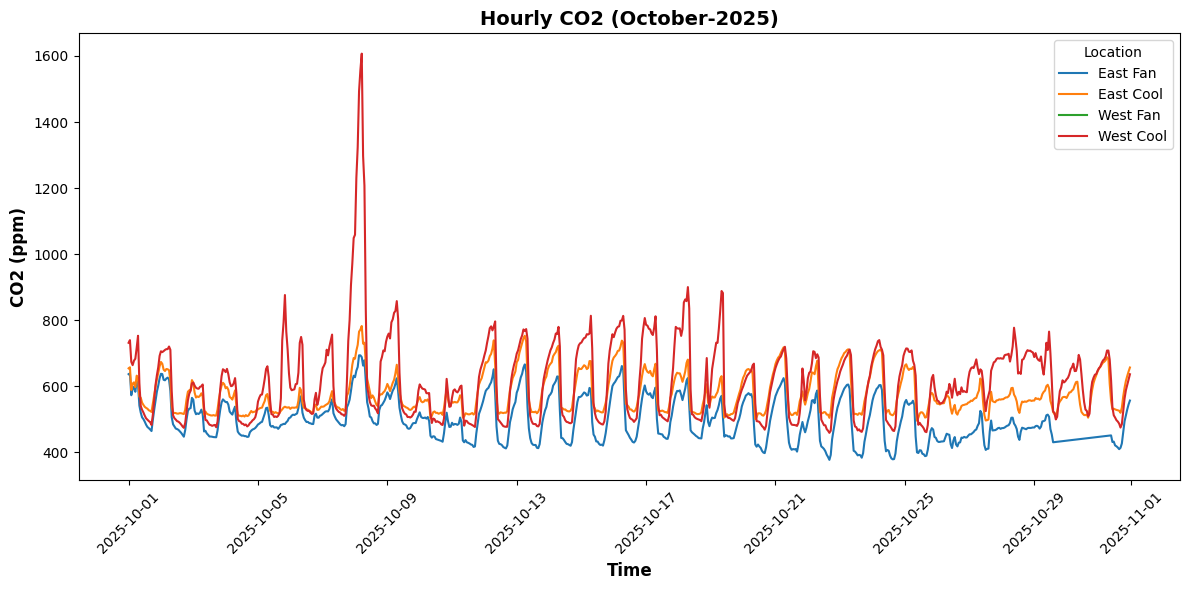

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_CO2, x='Date', y='CO2_Value', hue='Location')
plt.title('Hourly CO2 (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('CO2 (ppm)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

## Average CO2 of East & West side

In [ ]:
# Filter
CO2_east_fan = melted_CO2[melted_CO2['Location'] == 'East Fan']
CO2_east_cool = melted_CO2[melted_CO2['Location'] == 'East Cool']
CO2_west_fan = melted_CO2[melted_CO2['Location'] == 'West Fan']
CO2_west_cool = melted_CO2[melted_CO2['Location'] == 'West Cool']

# Combine the two DataFrames
combined_east_CO2 = pd.concat([CO2_east_fan, CO2_east_cool])
combined_west_CO2 = pd.concat([CO2_west_fan, CO2_west_cool])

# Average the CO2 by Date
averaged_CO2_east = combined_east_CO2.groupby('Date').agg({'CO2_Value': 'mean'})
averaged_CO2_west = combined_west_CO2.groupby('Date').agg({'CO2_Value': 'mean'})

# Display hourly average CO2 data
print(averaged_CO2_east)

                      CO2_Value
Date                           
2025-10-01 00:00:00  645.516667
2025-10-01 01:00:00  648.500000
2025-10-01 02:00:00  580.825000
2025-10-01 03:00:00  600.350000
2025-10-01 04:00:00  605.308333
...                         ...
2025-10-31 19:00:00  544.550000
2025-10-31 20:00:00  564.433333
2025-10-31 21:00:00  580.675000
2025-10-31 22:00:00  595.008333
2025-10-31 23:00:00  606.941667

[744 rows x 1 columns]


In [ ]:
# Create a new Excel file with both datasets in separate sheets
output_file_CO2 = "/content/Oct-25_CO2.xlsx"

with pd.ExcelWriter(output_file_CO2) as writer:
  hourly_CO2_EF.to_excel(writer, sheet_name='East fan')
  hourly_CO2_EC.to_excel(writer, sheet_name='East cool')
  averaged_CO2_east.to_excel(writer, sheet_name='Average East')
  hourly_CO2_WF.to_excel(writer, sheet_name='West fan')
  hourly_CO2_WC.to_excel(writer, sheet_name='West cool')
  averaged_CO2_west.to_excel(writer, sheet_name='Average West')

In [ ]:
# Load the data from the Excel file
file_path_CO2 = "/content/Oct-25_CO2.xlsx"
CO2_east_avg = pd.read_excel(file_path_CO2, sheet_name='Average East')
CO2_west_avg = pd.read_excel(file_path_CO2, sheet_name='Average West')

# Rename date columns for consistency
CO2_east_avg.rename(columns={'Date': 'Date', 'CO2_Value': 'CO2'}, inplace=True)
CO2_west_avg.rename(columns={'Date': 'Date', 'CO2_Value': 'CO2'}, inplace=True)

# Add a Location column to each DataFrame
CO2_east_avg['Location'] = 'East Avg CO2'
CO2_west_avg['Location'] = 'West Avg CO2'

# Combine the data
combined_CO21 = pd.concat([
    CO2_east_avg,
    CO2_west_avg,
    ], ignore_index=True)

print("Columns in Combined Data:", combined_CO21.columns.tolist())

# Reshape the data to long format
melted_CO21 = pd.melt(combined_CO21,
                      id_vars=['Location', 'Date'],
                      value_vars=['CO2'],
                      var_name='CO2_Type',  # This can be kept as-is
                      value_name='CO2_Value')  # Changed from 'CO2' to

melted_CO21.head()

Columns in Combined Data: ['Date', 'CO2', 'Location']


,Location,Date,CO2_Type,CO2_Value
0,East Avg CO2,2025-10-01 00:00:00,CO2,645.516667
1,East Avg CO2,2025-10-01 01:00:00,CO2,648.500000
2,East Avg CO2,2025-10-01 02:00:00,CO2,580.825000
3,East Avg CO2,2025-10-01 03:00:00,CO2,600.350000
4,East Avg CO2,2025-10-01 04:00:00,CO2,605.308333


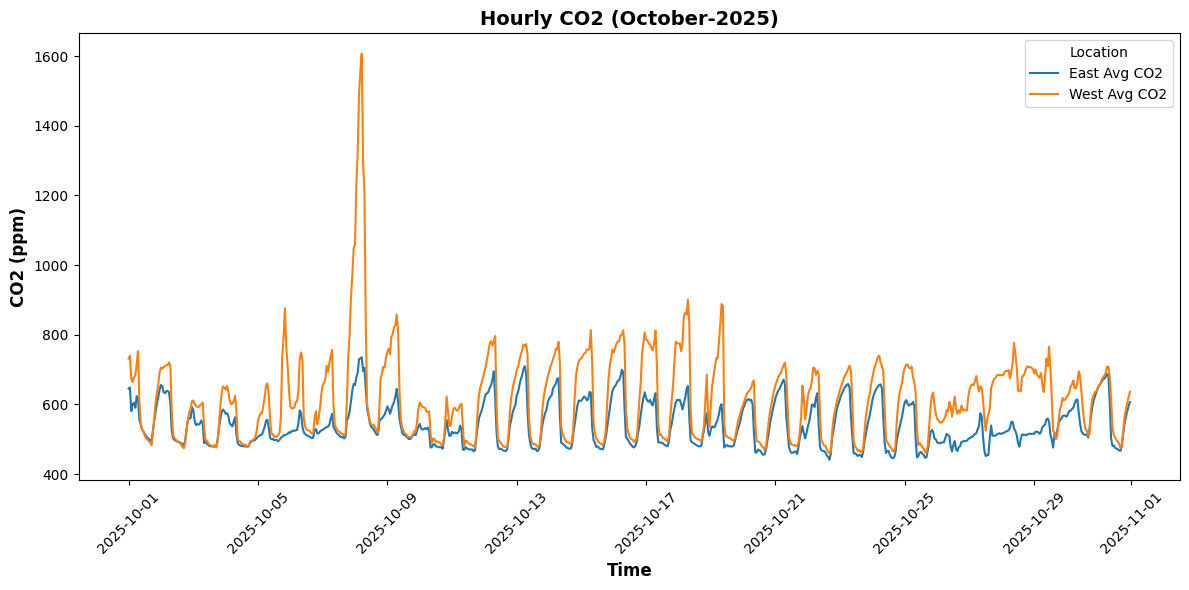

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_CO21, x='Date', y='CO2_Value', hue='Location')
plt.title('Hourly CO2 (October-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12, fontweight='bold')
plt.ylabel('CO2 (ppm)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Location')
plt.tight_layout()
plt.show()